In [98]:
# Initial imports
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

#  Import and read the file.
import pandas as pd 
supply_df = pd.read_csv("./CAISO-ALL-SUPPLY-DATA.csv")
supply_df.head()

#Add in a column for MW of demand of cars. Do the absolute value for the demand.create dummy value to create everything to 
#negative and postive

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,7/5/21,11:50:00,7/5/21 11:50
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,8/18/20,16:25:00,8/18/20 16:25
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,8/18/20,15:55:00,8/18/20 15:55
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,8/18/20,15:50:00,8/18/20 15:50
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,8/18/20,15:40:00,8/18/20 15:40


In [99]:
supply_df['Sum'] = supply_df['Renewables'] + supply_df['Large hydro'] + supply_df['Imports'] + supply_df['Batteries'] + supply_df['Nuclear'] + supply_df['Coal'] + supply_df['Other'] + supply_df['Natural gas']

In [100]:
weird_df = supply_df['Sum'][supply_df['Sum'] > 90000]

In [101]:
weird_df.head()

Series([], Name: Sum, dtype: float64)

In [102]:
supply_df= supply_df.drop(['Renewables', 'Batteries', 'Large hydro', 'Imports', 'Other', 'Nuclear', 'Coal', 'DateTime'],1)
supply_df.head(1000)

,Natural gas,Date,Time,Sum
0,5568.0,7/5/21,11:50:00,59874.0
1,26540.0,8/18/20,16:25:00,47279.0
2,26159.0,8/18/20,15:55:00,47243.0
3,26132.0,8/18/20,15:50:00,47210.0
4,26015.0,8/18/20,15:40:00,47209.0
...,...,...,...,...
995,19813.0,8/26/19,18:00:00,43499.0
996,19813.0,8/27/19,18:00:00,43499.0
997,23554.0,8/15/20,15:20:00,43499.0
998,18174.0,7/27/18,17:40:00,43497.0


In [103]:
supply_df['Date'] = pd.to_datetime(supply_df['Date'])

In [104]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [105]:
supply_df['Date'] = supply_df['Date'].apply(fun)
supply_df.head(1000)

,Natural gas,Date,Time,Sum
0,5568.0,186,11:50:00,59874.0
1,26540.0,231,16:25:00,47279.0
2,26159.0,231,15:55:00,47243.0
3,26132.0,231,15:50:00,47210.0
4,26015.0,231,15:40:00,47209.0
...,...,...,...,...
995,19813.0,238,18:00:00,43499.0
996,19813.0,239,18:00:00,43499.0
997,23554.0,228,15:20:00,43499.0
998,18174.0,208,17:40:00,43497.0


In [106]:
supply_df.dtypes

Natural gas    float64
Date             int64
Time            object
Sum            float64
dtype: object

In [107]:
baby_df = supply_df['Time'].str.split(":", expand=True)
print(baby_df)

         0   1   2
0       11  50  00
1       16  25  00
2       15  55  00
3       15  50  00
4       15  40  00
...     ..  ..  ..
412947   2  35  00
412948   2  40  00
412949   2  45  00
412950   2  50  00
412951   2  55  00

[412952 rows x 3 columns]


In [108]:
baby_df[0] = baby_df[0].astype(int)
baby_df[1] = baby_df[1].astype(int)

In [109]:
baby_df= baby_df.drop([2],1)

In [110]:
baby_df.dtypes

0    int64
1    int64
dtype: object

In [111]:
baby_df = baby_df.rename(columns={baby_df.columns[0]: 'Hours'})
baby_df = baby_df.rename(columns={baby_df.columns[1]: 'Minutes'})

In [112]:
baby_df.head()

,Hours,Minutes
0,11,50
1,16,25
2,15,55
3,15,50
4,15,40


In [113]:
final_df = pd.merge(baby_df, supply_df, left_index=True, right_index=True, how='outer')

In [119]:
final_df.head()

,Hours,Minutes,Natural gas,Date,Sum
0,11,50,5568.0,186,59874.0
1,16,25,26540.0,231,47279.0
2,15,55,26159.0,231,47243.0
3,15,50,26132.0,231,47210.0
4,15,40,26015.0,231,47209.0


In [115]:
final_df= final_df.drop(['Time'],1)

In [116]:
len(final_df)

412952

In [140]:
pip install pingouin

     |████████████████████████████████| 183 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 55.3 MB 76.1 MB/s eta 0:00:01     |███████████████████             | 32.8 MB 35.9 MB/s eta 0:00:01��████████████▎| 54.0 MB 76.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 19.7 MB/s eta 0:00:01
     |████████████████████████████████| 870 kB 44.0 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 36.1 MB/s eta 0:00:01
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=193988 sha256=16c533d0714238caaa2668bdffa23a92cad3013dc7066db5f9799204fb971d71
  Stored in directory: /Users/rosestrauss/Library/Caches/pip/wheels/8e/f4/3f/2629f2a31641ee865256bd1a03e0f3c66cea7ba4fa30ca7f9e
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=eed2fb302d7457bf1af1320a2c2e418626f002fb26f442dce1ec887a595f35fa
  Stored in directory: /Users/rosestrauss/L

In [141]:
import pandas as pd
import pingouin as pg

aov = pg.anova(dv='len', between=['Hours', 'Minutes'], supply_data=df,
             detailed=True)

print(aov)

ImportError: cannot import name 'studentized_range' from 'scipy.stats' (/Users/rosestrauss/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/__init__.py)

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [72]:
final_df.head(1000)

,Hours,Minutes,Natural gas,Date,Sum
0,11,50,5568.0,186,59874.0
1,16,25,26540.0,231,47279.0
2,15,55,26159.0,231,47243.0
3,15,50,26132.0,231,47210.0
4,15,40,26015.0,231,47209.0
...,...,...,...,...,...
995,18,0,19813.0,238,43499.0
996,18,0,19813.0,239,43499.0
997,15,20,23554.0,228,43499.0
998,17,40,18174.0,208,43497.0


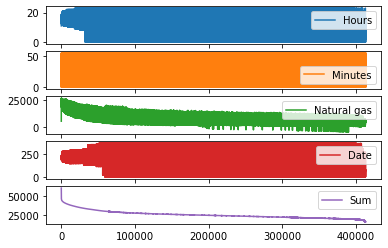

In [73]:
axes = final_df.plot.line(subplots=True)


In [82]:
# Create our features
X = final_df.drop("Natural gas", axis = 1)

# Create our target
y = final_df.loc[:, 'Natural gas'].copy()

In [83]:
final_df = final_df.dropna()

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [87]:
final_df.isnull().values.any()

False

In [88]:
count = np.isinf(final_df).values.sum()
print(count)

0


In [89]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [90]:
print(training_score)

#75 or above

0.5693510858183524


In [91]:
print(testing_score)

0.5706415408073546


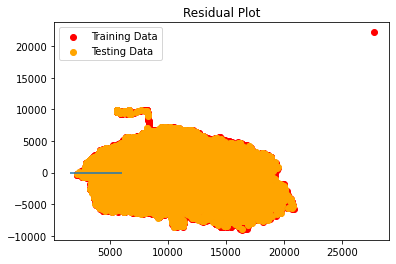

In [94]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="red", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=6000, xmax=1500)
plt.title("Residual Plot")
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5696781130021757


In [ ]:
#Use charging data to predict, that number times the current number of electricc ar to be baseline EV demand per hour and then
#muplitple it by the %change of electric vehicles. then take training or testing data, probably testing
#and add it to demand and predict supply.

In [ ]:
#Anova table  use P value to check what variable has more impact to the response variable. compare P values 